# Геометрические преобразования изображений
Выполнил: Гришин К. И.

In [21]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

## Задача
Реализовать на языке Python с использованием библиотеки OpenCV программу,
выполняющее геометрические преобразования изображения

## Входные данные

In [22]:
# Путь до входного изображения
image_path = './bmp_esher.bmp'

# Угол поворота [0..360)
rotation_angle = 70

# Коэффициент k (0..1]
stretch_coef = 0.5

# Признак используемой интерполяционной схемы
# ( 0 - нулевого порядка, 1 - первого порядка, 2 - третьего порядка).
interpolation_scheme = 0


def show_image(image):
    h, w = image.shape[:2]
    plt.figure(figsize=(w/75, h/75))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


isc = {
    0: cv2.INTER_NEAREST,
    1: cv2.INTER_LINEAR,
    2: cv2.INTER_AREA,
}


## Чтение изображения

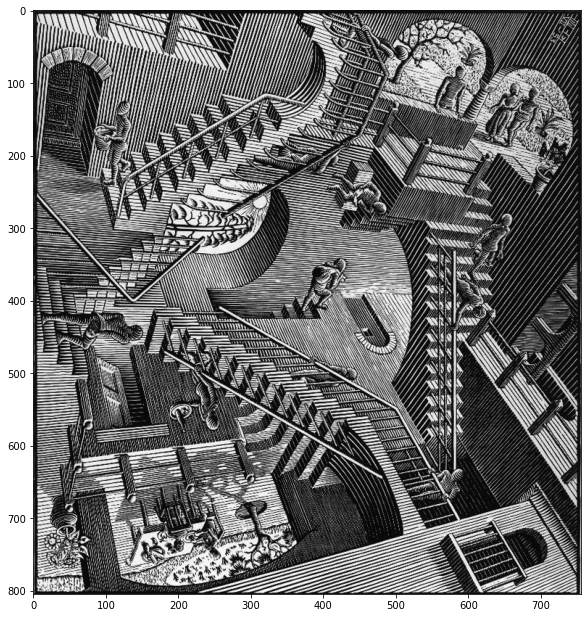

In [23]:
absoulte_path = os.path.abspath(image_path)
image = cv2.imread(absoulte_path, flags=cv2.IMREAD_UNCHANGED)
show_image(image)

## Поворот изображения

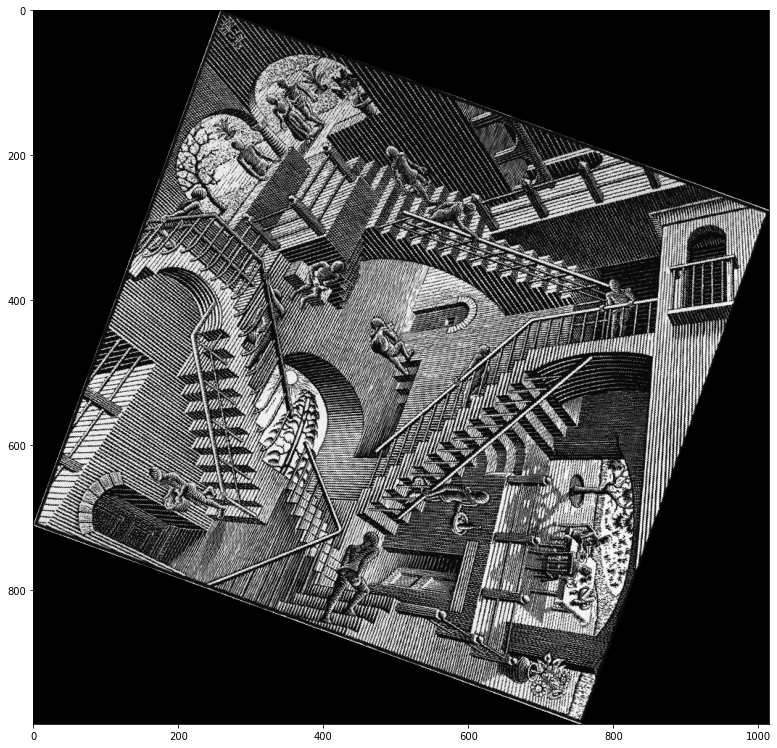

In [24]:
image_h, image_w = image.shape[:2]
image_cX, image_cY = (image_w/2, image_h/2)
matrix = cv2.getRotationMatrix2D((image_cX, image_cY), rotation_angle, 1.0)

cos = np.abs(matrix[0,0])
sin = np.abs(matrix[0,1])

nw = int(image_h*sin+image_w*cos)
nh = int(image_h*cos+image_w*sin)

matrix[0,2] += (nw/2) - image_cX
matrix[1,2] += (nh/2) - image_cY

rotated_image = cv2.warpAffine(image, matrix, (nw, nh), flags=isc[interpolation_scheme])
show_image(rotated_image)

## Вырезание прямоугольника максимальной площади

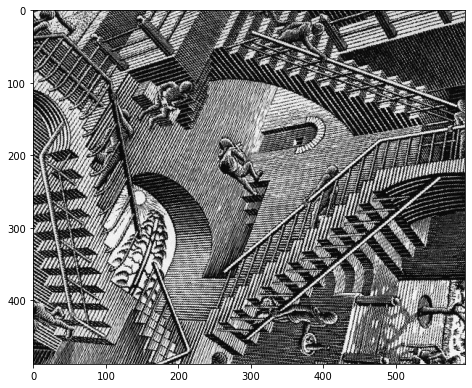

In [25]:
width_is_longer = image_w >= image_h
side_long, side_short = (image_w, image_h) if width_is_longer else (image_h, image_w)

# since the solutions for angle, -angle and 180-angle are all the same,
# if suffices to look at the first quadrant and the absolute values of sin,cos:
sin_a, cos_a = abs(np.sin(rotation_angle)), abs(np.cos(rotation_angle))
if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
    # half constrained case: two crop corners touch the longer side,
    #   the other two corners are on the mid-line parallel to the longer line
    x = 0.5*side_short
    crop_width, crop_height = (x/sin_a,x/cos_a) if width_is_longer else (x/cos_a,x/sin_a)
else:
    # fully constrained case: crop touches all 4 sides
    cos_2a = cos_a*cos_a - sin_a*sin_a
    crop_width, crop_height = (image_w*cos_a - image_h*sin_a)/cos_2a, (image_w*cos_a - image_h*sin_a)/cos_2a

rotated_h, rotated_w = rotated_image.shape[:2]
rotated_cX, rotated_cY = (rotated_w/2, rotated_h/2)

cropped_x1 = int(rotated_cX - crop_width * 0.5)
cropped_x2 = int(rotated_cX + crop_width * 0.5)
cropped_y1 = int(rotated_cY - crop_height * 0.5)
cropped_y2 = int(rotated_cY + crop_height * 0.5)

cropped_image = rotated_image[
    cropped_y1:cropped_y2,
    cropped_x1:cropped_x2,
]

show_image(cropped_image)

## Масштабирование по коэффициенту

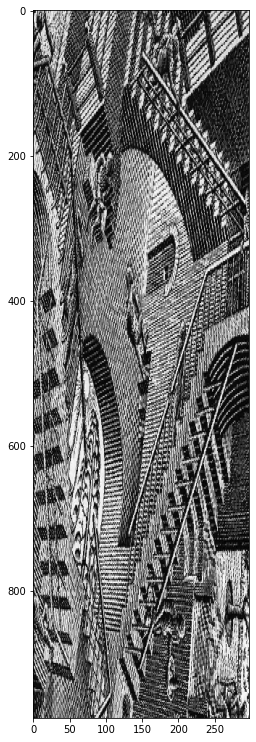

In [26]:
cropped_h, cropped_w = cropped_image.shape[:2]

scaled_dim = (
    int(cropped_w * stretch_coef),
    int(cropped_h / stretch_coef)
)

stretched_image = cv2.resize(cropped_image, scaled_dim, interpolation=isc[interpolation_scheme])
show_image(stretched_image)

## Сохранение изобрежния

In [27]:
output_path = f"{os.path.splitext(os.path.abspath(image_path))[0]}_processed.bmp"
cv2.imwrite(output_path, stretched_image)

True